In [1]:
from bs4 import BeautifulSoup
import requests
import itertools
import re
result = []
for j in range(8):
    url = "https://icook.tw/categories/68?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))
print('Number of total pairs:', len(result))
print('Some examples:', result[:6])

Number of total pairs: 3843
Some examples: [('法國麵包', '牛蕃茄'), ('法國麵包', '起司絲'), ('法國麵包', '雞肉丁'), ('牛蕃茄', '起司絲'), ('牛蕃茄', '雞肉丁'), ('起司絲', '雞肉丁')]


/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.2rc2_1932.g75a35ef-py3.4-linux-x86_64.egg/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


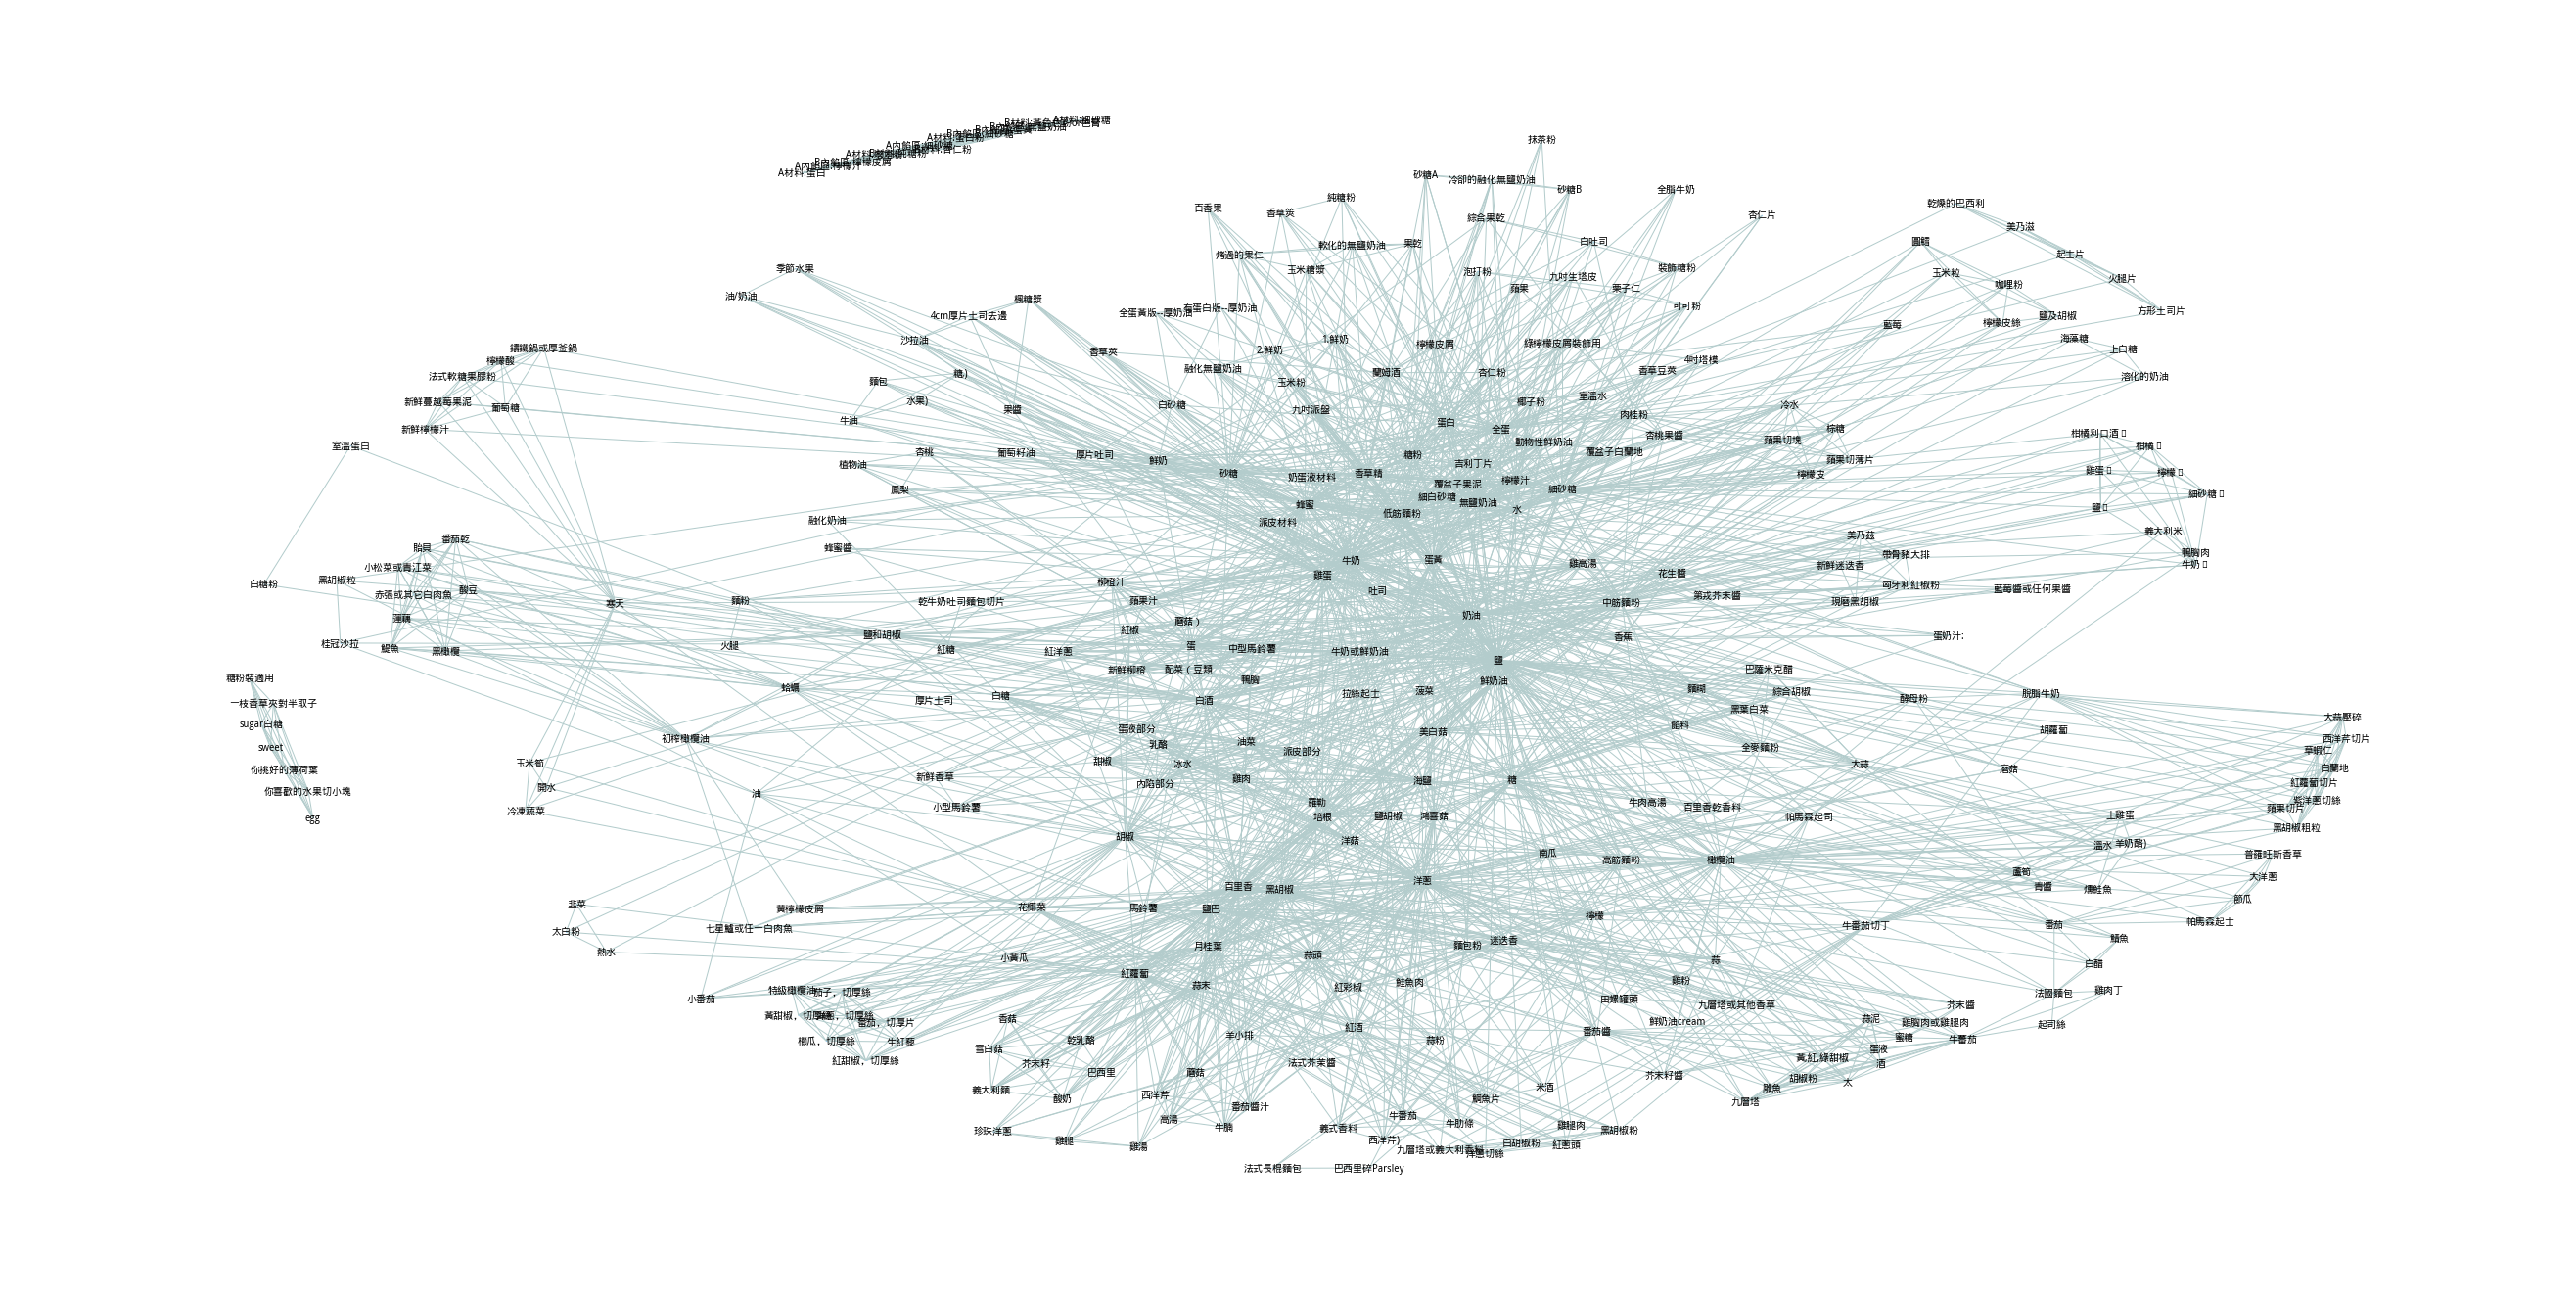

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
%matplotlib inline

WQY = fm.FontProperties(fname = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
nx.set_fontproperties(WQY)

default_weight = 0.2
G = nx.Graph()

BLUE = "#99CCFF"
GRAY = "#b3cccc"

for nodes in result:
    n0 = nodes[0]
    n1 = nodes[1]
    if G.has_edge(n0,n1):   
        G[n0][n1]['weight'] += default_weight
    else:
        G.add_edge(n0,n1, weight = default_weight)


nx.draw(G, node_color = BLUE, with_labels = True,edge_color = GRAY, node_size = 1)
fig = plt.gcf()
fig.set_size_inches(36, 18)
fig.savefig('french_recipe.png', dpi=100)

In [3]:
import operator
from collections import Counter

sorted_dg = sorted(nx.degree(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree:',sorted_dg[:15])

print()

sorted_close = sorted(nx.closeness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Closeness centrality:',sorted_close[:15])

print()

sorted_degree = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree centrality:',sorted_degree[:15])


Degree: [('鹽', 136), ('牛奶', 107), ('奶油', 96), ('洋蔥', 87), ('雞蛋', 82), ('無鹽奶油', 76), ('蜂蜜', 72), ('蛋黃', 67), ('糖', 63), ('低筋麵粉', 62), ('橄欖油', 61), ('砂糖', 58), ('百里香', 57), ('鮮奶油', 55), ('鹽巴', 54)]

Closeness centrality: [('鹽', 0.5963437943153092), ('牛奶', 0.5544752546764734), ('奶油', 0.5371479029678335), ('洋蔥', 0.5265017283144171), ('無鹽奶油', 0.5265017283144171), ('雞蛋', 0.5144515127015872), ('蜂蜜', 0.5090739707569713), ('糖', 0.50467782247755), ('蛋黃', 0.49950163968290856), ('低筋麵粉', 0.4969531619294243), ('鹽巴', 0.49610943839473937), ('中筋麵粉', 0.49610943839473937), ('鮮奶油', 0.493595370294766), ('黑胡椒', 0.4927630003617226), ('白酒', 0.4902826496887609)]

Degree centrality: [('鹽', 0.4108761329305136), ('牛奶', 0.32326283987915405), ('奶油', 0.29003021148036257), ('洋蔥', 0.2628398791540785), ('雞蛋', 0.24773413897280966), ('無鹽奶油', 0.229607250755287), ('蜂蜜', 0.2175226586102719), ('蛋黃', 0.20241691842900303), ('糖', 0.1903323262839879), ('低筋麵粉', 0.18731117824773413), ('橄欖油', 0.18429003021148035), ('砂糖', 0.17522658

In [4]:
nd = G.number_of_nodes()
possible_edges = nd*(nd-1)/2

print('Total possible edges:',possible_edges)
print('Total edges in the graph:',G.number_of_edges())

density = round(nx.density(G),4)
print('Density:',density)
print()
print(nx.info(G))

Total possible edges: 54946.0
Total edges in the graph: 2527
Density: 0.046

Name: 
Type: Graph
Number of nodes: 332
Number of edges: 2527
Average degree:  15.2229


In [8]:
import operator
from collections import Counter
myDict = Counter(result)
sorted_x = sorted(myDict.items(), key = operator.itemgetter(1), reverse = True)
print('Number of sorted unique pairs:', len(sorted_x))
print(sorted_x[:15])

Number of sorted unique pairs: 2716
[(('低筋麵粉', '鹽'), 15), (('低筋麵粉', '無鹽奶油'), 12), (('雞蛋', '牛奶'), 12), (('無鹽奶油', '鹽'), 11), (('低筋麵粉', '牛奶'), 10), (('無鹽奶油', '細砂糖'), 10), (('牛奶', '奶油'), 9), (('低筋麵粉', '細砂糖'), 9), (('牛奶', '鹽'), 8), (('鹽', '水'), 8), (('細白砂糖', '覆盆子果泥'), 8), (('低筋麵粉', '砂糖'), 8), (('牛奶', '香草精'), 8), (('低筋麵粉', '雞蛋'), 8), (('牛奶', '蜂蜜'), 8)]


In [6]:
max_degree_item = max(nx.degree(G).items(),key=operator.itemgetter(1))
print(max_degree_item[1])

136


In [7]:
total = 0
for i,v in nx.degree(G).items():
    subv = max_degree_item[1] - v
    total += subv

dn = (nd-1)*(nd-2)
centr = total/dn
print('Group centrality:',round(centr,4))

Group centrality: 0.3671
